<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/projectmini1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required packages for this module
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import json
jsonpath=Path('/content/drive/MyDrive/Mini Project/datasetnew.json')
with jsonpath.open('r',encoding='utf-8')as dat_f:
  dat=json.loads(dat_f.read())
  df=pd.json_normalize(dat)
  df.to_csv('/content/drive/MyDrive/Mini Project/newdataset.csv',encoding='utf-8',index=False)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Mini Project/newdataset.csv")
data

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,interface_ip,segment_id,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4171,322,nvd,2019-11-29T12:11:06.587Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,c9845596-2a1c-40fa-ba73-1a3cb250e988,3
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4181,322,nvd,2019-11-29T12:11:06.589Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,a3e78117-f02b-4a58-9194-39b8c153b1fb,3
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4138,322,nvd,2019-11-29T12:11:06.413Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4128,322,nvd,2019-11-29T12:11:06.406Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,9c819b01-6e5c-4985-92a6-132c98cb6f63,3
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4227,322,nvd,2019-11-29T12:11:06.41Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-6924,322,nvd,2019-11-29T12:11:06.398Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7511c8ec-d15e-4856-b2ea-ae52ccf51b39,3
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4235,322,nvd,2019-11-29T12:11:06.592Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,0de5284e-30c9-4f12-9816-e64a3271e0af,3
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.855Z,40,CVE-2016-4166,322,nvd,2019-11-29T12:11:06.595Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,f13e5381-0167-4c2e-9d3d-211480c7cd3a,3
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.855Z,40,CVE-2016-4174,322,nvd,2019-11-29T12:11:06.62Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,884fe9a3-b70c-49f4-9299-230b73c63cf9,3


In [ ]:
ds=data[['modload_count','process_path','sensor_criticality','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:
ds

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-6924,['carbonblack'],40,27.0
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4235,['carbonblack'],40,27.0
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4166,['carbonblack'],40,27.0
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4174,['carbonblack'],40,27.0


In [ ]:
ds.dtypes

modload_count          object
process_path           object
sensor_criticality      int64
alert_type             object
@timestamp             object
watchlist_id           object
tags                   object
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
df=ds
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-6924,['carbonblack'],40,27.0
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4235,['carbonblack'],40,27.0
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4166,['carbonblack'],40,27.0
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4174,['carbonblack'],40,27.0


In [ ]:
#Preprocessing
#applying the labelencoder for datatype convertion
from sklearn.preprocessing  import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
df['modload_count']=label_encoder.fit_transform(df['modload_count'].astype(str))
df['process_path']=label_encoder.fit_transform(df['process_path'].astype(str))
df['alert_type']=label_encoder.fit_transform(df['alert_type'].astype(str))
df['watchlist_id']=label_encoder.fit_transform(df['watchlist_id'].astype(str))
df['tags']=label_encoder.fit_transform(df['tags'].astype(str))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0,1,3,0,2019-11-29T12:18:17.856Z,14,0,40,27.0
1,0,1,3,0,2019-11-29T12:18:17.856Z,16,0,40,27.0
2,0,1,3,0,2019-11-29T12:18:17.856Z,11,0,40,27.0
3,0,1,3,0,2019-11-29T12:18:17.856Z,10,0,40,27.0
4,0,1,3,0,2019-11-29T12:18:17.856Z,19,0,40,27.0
...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,2019-11-29T12:18:17.856Z,25,0,40,27.0
2368,0,1,3,0,2019-11-29T12:18:17.856Z,20,0,40,27.0
2369,0,1,3,0,2019-11-29T12:18:17.855Z,13,0,40,27.0
2370,0,1,3,0,2019-11-29T12:18:17.855Z,15,0,40,27.0


In [ ]:
df.dtypes

modload_count           int64
process_path            int64
sensor_criticality      int64
alert_type              int64
@timestamp             object
watchlist_id            int64
tags                    int64
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
pd.to_datetime(df['@timestamp'])

0      2019-11-29 12:18:17.856000+00:00
1      2019-11-29 12:18:17.856000+00:00
2      2019-11-29 12:18:17.856000+00:00
3      2019-11-29 12:18:17.856000+00:00
4      2019-11-29 12:18:17.856000+00:00
                     ...               
2367   2019-11-29 12:18:17.856000+00:00
2368   2019-11-29 12:18:17.856000+00:00
2369   2019-11-29 12:18:17.855000+00:00
2370   2019-11-29 12:18:17.855000+00:00
2371   2019-11-29 12:18:17.855000+00:00
Name: @timestamp, Length: 2372, dtype: datetime64[ns, UTC]

In [ ]:
df['@timestamp']=label_encoder.fit_transform(df['@timestamp'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0,1,3,0,12,14,0,40,27.0
1,0,1,3,0,12,16,0,40,27.0
2,0,1,3,0,12,11,0,40,27.0
3,0,1,3,0,12,10,0,40,27.0
4,0,1,3,0,12,19,0,40,27.0
...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,12,25,0,40,27.0
2368,0,1,3,0,12,20,0,40,27.0
2369,0,1,3,0,11,13,0,40,27.0
2370,0,1,3,0,11,15,0,40,27.0


In [ ]:
df.dtypes

modload_count           int64
process_path            int64
sensor_criticality      int64
alert_type              int64
@timestamp              int64
watchlist_id            int64
tags                    int64
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
x=df.drop(["report_score"],axis=1)
y=df["report_score"]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)


In [ ]:
y

0       40
1       40
2       40
3       40
4       40
        ..
2367    40
2368    40
2369    40
2370    40
2371    40
Name: report_score, Length: 2372, dtype: int64

In [ ]:
my_series = pd.Series(y)

d = my_series.to_frame()
d = d.rename(columns = {0:'report_score'})

print(d)
print(type(d))

      report_score
0               40
1               40
2               40
3               40
4               40
...            ...
2367            40
2368            40
2369            40
2370            40
2371            40

[2372 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
y=d
y

,report_score
0,40
1,40
2,40
3,40
4,40
...,...
2367,40
2368,40
2369,40
2370,40


In [ ]:
y.loc[(y['report_score'] >=10) & (y['report_score'] < 30), 'class'] = "LowRisk"  
y.loc[(y['report_score'] >=30) & (y['report_score'] < 55), 'class'] = "MediumRisk" 
y.loc[(y['report_score'] >=55) & (y['report_score'] < 75), 'class'] = "AverageRisk" 
y.loc[(y['report_score'] >=75) & (y['report_score'] < 100), 'class'] = "HighRisk" 


In [ ]:
y

,report_score,class
0,40,MediumRisk
1,40,MediumRisk
2,40,MediumRisk
3,40,MediumRisk
4,40,MediumRisk
...,...,...
2367,40,MediumRisk
2368,40,MediumRisk
2369,40,MediumRisk
2370,40,MediumRisk


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='AverageRisk':
        return 2
    elif report_score=='HighRisk':
        return 3

In [ ]:
y['class'] = y['class'].apply(cdc)
y


,report_score,class
0,40,1
1,40,1
2,40,1
3,40,1
4,40,1
...,...,...
2367,40,1
2368,40,1
2369,40,1
2370,40,1


In [ ]:
y=y.drop(["report_score"],axis=1)

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
2367,1
2368,1
2369,1
2370,1


In [ ]:
y.value_counts()

class
1        1913
2         180
3         174
0         105
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[0.        , 1.        , 0.        , ..., 0.51851852, 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.51851852, 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.74074074, 0.        ,
        0.21052632],
       ...,
       [0.        , 1.        , 0.        , ..., 0.55555556, 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.7037037 , 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.85185185, 0.        ,
        0.21052632]])

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.score(x_test,y_test)

0.8463157894736842

In [ ]:
#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
sv.score(x_test,y_test)

0.8968421052631579

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
knn_clf.score(x_test,y_test)

0.8863157894736842

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
rf.score(x_test,y_test)

0.9073684210526316

In [ ]:
#Model evalution of Naive Bayes
y_pred=clf.predict(x_test)

In [ ]:
confusion=confusion_matrix(y_test,y_pred)

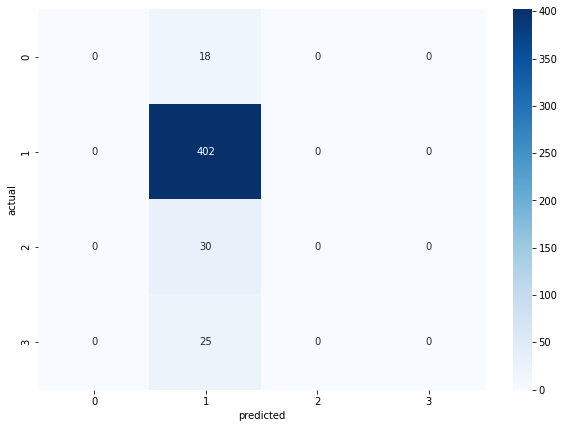

In [ ]:
plt.figure(figsize = (10,7))

sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of naive bayes \n")
print(classification_report(y_test,y_pred))

Classification report of naive bayes 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.85      1.00      0.92       402
           2       0.00      0.00      0.00        30
           3       0.00      0.00      0.00        25

    accuracy                           0.85       475
   macro avg       0.21      0.25      0.23       475
weighted avg       0.72      0.85      0.78       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Model evalution of SVM
y_pred2 = sv.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred2)

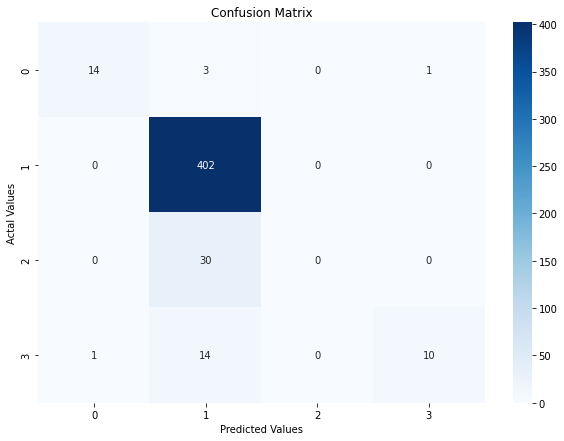

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [ ]:
print("Classification report of svm \n")
print(classification_report(y_test,y_pred2))

Classification report of svm 

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.90      1.00      0.94       402
           2       0.00      0.00      0.00        30
           3       0.91      0.40      0.56        25

    accuracy                           0.90       475
   macro avg       0.68      0.54      0.59       475
weighted avg       0.84      0.90      0.86       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


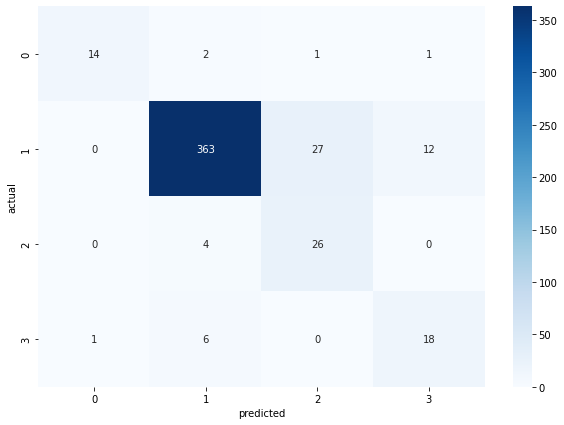

In [ ]:
#Model evalution of KNN
y_pred3=knn_clf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of KNN \n")
print(classification_report(y_test,y_pred3))

Classification report of KNN 

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.97      0.90      0.93       402
           2       0.48      0.87      0.62        30
           3       0.58      0.72      0.64        25

    accuracy                           0.89       475
   macro avg       0.74      0.82      0.76       475
weighted avg       0.92      0.89      0.90       475



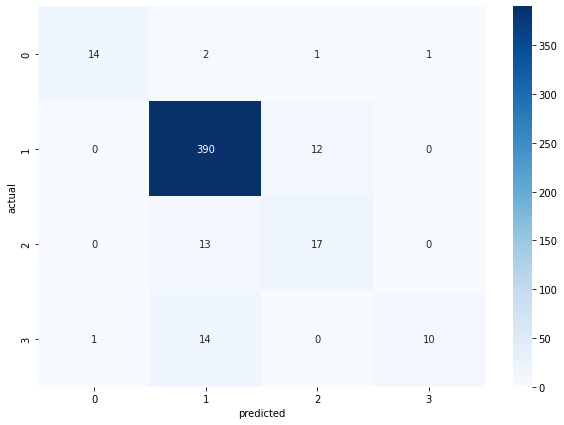

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
           1       0.93      0.97      0.95       402
           2       0.57      0.57      0.57        30
           3       0.91      0.40      0.56        25

    accuracy                           0.91       475
   macro avg       0.83      0.68      0.73       475
weighted avg       0.91      0.91      0.90       475



In [ ]:
df.report_score.value_counts()

40    1879
55      90
28      85
85      76
80      49
66      46
70      41
88      21
75      20
45      11
22       6
30       6
20       6
52       4
25       4
15       3
33       3
39       3
36       2
82       2
44       2
63       2
89       2
41       1
35       1
26       1
78       1
99       1
56       1
96       1
77       1
46       1
Name: report_score, dtype: int64

In [ ]:
df


,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0,1,3,0,12,14,0,40,27.0
1,0,1,3,0,12,16,0,40,27.0
2,0,1,3,0,12,11,0,40,27.0
3,0,1,3,0,12,10,0,40,27.0
4,0,1,3,0,12,19,0,40,27.0
...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,12,25,0,40,27.0
2368,0,1,3,0,12,20,0,40,27.0
2369,0,1,3,0,11,13,0,40,27.0
2370,0,1,3,0,11,15,0,40,27.0


In [ ]:
df.loc[(df['report_score'] >=10) & (df['report_score'] < 30), 'class'] = "LowRisk"  
df.loc[(df['report_score'] >=30) & (df['report_score'] < 55), 'class'] = "MediumRisk" 
df.loc[(df['report_score'] >=55) & (df['report_score'] < 75), 'class'] = "AverageRisk" 
df.loc[(df['report_score'] >=75) & (df['report_score'] < 100), 'class'] = "HighRisk" 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='AverageRisk':
        return 2
    elif report_score=='HighRisk':
        return 3

In [ ]:
df['class'] = df['class'].apply(cdc)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
0,0,1,3,0,12,14,0,40,27.0,1
1,0,1,3,0,12,16,0,40,27.0,1
2,0,1,3,0,12,11,0,40,27.0,1
3,0,1,3,0,12,10,0,40,27.0,1
4,0,1,3,0,12,19,0,40,27.0,1
...,...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,12,25,0,40,27.0,1
2368,0,1,3,0,12,20,0,40,27.0,1
2369,0,1,3,0,11,13,0,40,27.0,1
2370,0,1,3,0,11,15,0,40,27.0,1


In [ ]:
df["class"].value_counts()

1    1913
2     180
3     174
0     105
Name: class, dtype: int64

In [ ]:
low=df[df["class"]==0]
medium=df[df["class"]==1]
avg=df[df["class"]==2]
high=df[df["class"]==3]

In [ ]:
n=len(medium)

In [ ]:
low_over = low.sample(n, replace=True)
avg_over = avg.sample(n, replace=True)
high_over = high.sample(n, replace=True)

In [ ]:
low_over.shape
avg_over.shape
high_over.shape

(1913, 10)

In [ ]:
data_over = pd.concat([low_over,medium,avg_over,high_over], axis=0)

In [ ]:
data_over["class"].value_counts()

0    1913
1    1913
2    1913
3    1913
Name: class, dtype: int64

In [ ]:
data_over

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity,class
1024,0,1,3,0,9,3,0,26,27.000,0
1372,0,1,3,0,4,12,0,28,18.900,0
1708,0,1,3,0,4,12,0,28,18.900,0
706,0,1,3,0,7,12,0,28,18.900,0
480,0,1,3,0,7,12,0,28,18.900,0
...,...,...,...,...,...,...,...,...,...,...
1670,0,1,3,0,5,17,0,80,27.000,3
1944,0,1,3,0,5,17,0,80,27.000,3
1479,0,0,3,0,10,27,0,85,57.375,3
1878,0,1,3,0,2,25,0,77,27.000,3


In [ ]:
data_over=data_over.sample(frac=1)

In [ ]:
x=data_over.drop(["class","report_score"],axis=1)
y=data_over["class"]

In [ ]:
x.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

In [ ]:
y

0       1
1       0
2       3
3       0
4       0
       ..
7647    3
7648    0
7649    3
7650    1
7651    3
Name: class, Length: 7652, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_df = scaler.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

array([[0.        , 1.        , 0.        , ..., 0.44444444, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.62962963, 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.21052632],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.22222222, 0.        ,
        0.21052632],
       [0.        , 1.        , 0.        , ..., 0.66666667, 0.        ,
        0.21052632]])

In [ ]:
#Applying Naive Bayes
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_prednb=clf.predict(x_test)

In [ ]:
clf.score(x_test,y_test)

0.5551926845199217

In [ ]:
#Applying SVM
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')
sv.fit(x_train,y_train)
y_predsvm=sv.predict(x_train)


In [ ]:
sv.score(x_test,y_test)

0.6342259960809928

In [ ]:
#Applying KNN
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
ypred_knn=knn_clf.predict(x_test)


In [ ]:
knn_clf.score(x_test,y_test)

0.8125408229915089

In [ ]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predrf=rf.predict(x_test)



In [ ]:
rf.score(x_test,y_test)

0.8327890267798824

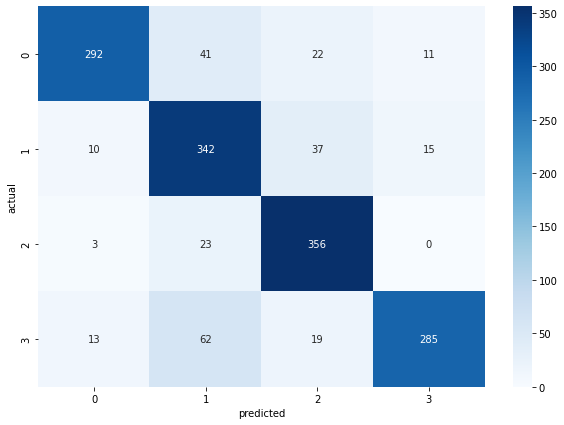

In [ ]:
#Model Evaluation of Random Forest
y_pred4=rf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred4)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of Random Forest \n")
print(classification_report(y_test,y_pred4))

Classification report of Random Forest 

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       366
           1       0.73      0.85      0.78       404
           2       0.82      0.93      0.87       382
           3       0.92      0.75      0.83       379

    accuracy                           0.83      1531
   macro avg       0.85      0.83      0.83      1531
weighted avg       0.84      0.83      0.83      1531

